# Budapest restaurants and cuisines

This short project serves as practice with geospatial data, as well as a cool way to visualize the most dominant cuisines in each district of Budapest. Data is obtained via [`OSMNx`](https://osmnx.readthedocs.io/en/stable/index.html), visualizations are created with `matplotlib.pyplot`.

The question I'd like to answer isn't based on the number of restaurants as some restaurants might serve multiple different cuisines.

#### Import libraries

In [1]:
import pandas as pd
import osmnx as ox
import inflect # to create the district numbers
import matplotlib.pyplot as plt

### Data gathering
#### Create a list of the districts of Budapest

This will be used to create the map, as well as to get all restaurants through `osmnx`. There are 23 districts in Budapest.

In [2]:
budapest_districts = []
for i in range(1, 24):
    budapest_districts.append(inflect.engine().ordinal(i) + ' District, Budapest, Hungary')

In [3]:
print(budapest_districts)

['1st District, Budapest, Hungary', '2nd District, Budapest, Hungary', '3rd District, Budapest, Hungary', '4th District, Budapest, Hungary', '5th District, Budapest, Hungary', '6th District, Budapest, Hungary', '7th District, Budapest, Hungary', '8th District, Budapest, Hungary', '9th District, Budapest, Hungary', '10th District, Budapest, Hungary', '11th District, Budapest, Hungary', '12th District, Budapest, Hungary', '13th District, Budapest, Hungary', '14th District, Budapest, Hungary', '15th District, Budapest, Hungary', '16th District, Budapest, Hungary', '17th District, Budapest, Hungary', '18th District, Budapest, Hungary', '19th District, Budapest, Hungary', '20th District, Budapest, Hungary', '21st District, Budapest, Hungary', '22nd District, Budapest, Hungary', '23rd District, Budapest, Hungary']


#### Get all restaurants from each district of Budapest

* Get all "restaurant" and "fast food" amenities with `osmnx` for each district
* Keep the `unique_id` and `cuisine` columns and add a flag for the districts

In [4]:
bp_cuisines = []
for district in budapest_districts:
    amenities = ox.geometries_from_place(district, tags={'amenity': ['restaurant', 'fast_food']})
    cuisines = amenities[['unique_id', 'cuisine']]
    cuisines['district'] = district
    bp_cuisines.append(cuisines)

bp_cuisines = pd.concat(bp_cuisines)
bp_cuisines.to_csv('bp_cuisines.csv')

<ipython-input-4-8d5a34f50061>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cuisines['district'] = district
<ipython-input-4-8d5a34f50061>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cuisines['district'] = district
<ipython-input-4-8d5a34f50061>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [5]:
bp_cuisines = pd.read_csv('bp_cuisines.csv')
bp_cuisines.head()

C:\Users\szige\anaconda3\envs\ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,unique_id,cuisine,district
0,0,node/339287577,burger,"1st District, Budapest, Hungary"
1,1,node/412953469,NaN,"1st District, Budapest, Hungary"
2,2,node/412953471,chinese,"1st District, Budapest, Hungary"
3,3,node/427003905,NaN,"1st District, Budapest, Hungary"
4,4,node/432490789,NaN,"1st District, Budapest, Hungary"


* There are some `NaN` values, I'll drop those.

In [6]:
bp_cuisines.dropna(inplace=True)

C:\Users\szige\anaconda3\envs\ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
print(sorted(bp_cuisines['cuisine'].unique()))

['Hungarian', 'Hungarian_food', 'Lángos', 'Turkish;Regional', 'afghan;kebab;gyros', 'african', 'american', 'american;asian', 'american;barbecue', 'american;burger;regional;steak_house', 'american;burger;steak_house', 'american;grill;caribbean', 'american;hamburger;pizza', 'american;hungarian;grill;steak_house', 'american;mexican;pizza', 'arab', 'arab;hungarian', 'arab;turkish', 'arab;vietnamese;mediterranean', 'argentinian', 'asian', 'asian;chinese', 'asian;chinese;deli', 'asian;hungarian;coffee_shop;burger', 'asian;korean;japanese', 'asian;middle_eastern;central_asian;indian', 'asian;regional', 'asian;sushi', 'asian;vietnamese;thai;ramen', 'bagel;international;hungarian;coffee_shop', 'balkan', 'bangladeshi;indian;asian', 'barbecue', 'barbecue;hungarian;mongolian', 'barbecue;steak_house;grill;burger;breakfast;hungarian', 'bbq', 'bbq;soke_riders;fast_food;food_truck', 'belgian', 'breakfast', 'breakfast;coffee_shop;snackbar', 'burger', 'burger;breakfast', 'burger;chicken', 'burger;chicke

C:\Users\szige\anaconda3\envs\ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


* There seem to be a lot of unique records where multiple cuisines are concatenated, I'll have to break those out into separate rows.

In [8]:
print(bp_cuisines[bp_cuisines['cuisine'] == 'pizza;italian'])

      Unnamed: 0        unique_id        cuisine  \
136           41  node/2401121415  pizza;italian   
708          232  node/4340423047  pizza;italian   
1886          45  node/6749969867  pizza;italian   
2125          75  node/5650234396  pizza;italian   
2277          13  node/5298281628  pizza;italian   

                              district  
136    2nd District, Budapest, Hungary  
708    5th District, Budapest, Hungary  
1886  12th District, Budapest, Hungary  
2125  14th District, Budapest, Hungary  
2277  18th District, Budapest, Hungary  


In [9]:
cuisine_split = pd.DataFrame(bp_cuisines['cuisine'].str.split(';').tolist(), index=bp_cuisines['unique_id']).stack()
cuisine_split = cuisine_split.reset_index([0, 'unique_id'])
cuisine_split.columns = ['unique_id', 'cuisine_split']

C:\Users\szige\anaconda3\envs\ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


* Now I'll join back this dataframe to the original `bp_cuisines` dataframe.

In [10]:
bp_cuisines = bp_cuisines.merge(cuisine_split, how='left', on='unique_id')
bp_cuisines.head()

,Unnamed: 0,unique_id,cuisine,district,cuisine_split
0,0,node/339287577,burger,"1st District, Budapest, Hungary",burger
1,2,node/412953471,chinese,"1st District, Budapest, Hungary",chinese
2,5,node/648549895,crepe,"1st District, Budapest, Hungary",crepe
3,8,node/735178492,regional,"1st District, Budapest, Hungary",regional
4,9,node/735179122,hungarian;breakfast;regional,"1st District, Budapest, Hungary",hungarian


* I can get rid of the concatenated `cuisine` column and rename the `cuisine_split` column.

In [11]:
bp_cuisines = bp_cuisines.drop(columns=['cuisine', 'Unnamed: 0']).rename(columns={'cuisine_split': 'cuisine'})
bp_cuisines['cuisine'] = bp_cuisines['cuisine'].str.lower() # some cuisines appear as both lower and uppercase
bp_cuisines.head()

C:\Users\szige\anaconda3\envs\ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,unique_id,district,cuisine
0,node/339287577,"1st District, Budapest, Hungary",burger
1,node/412953471,"1st District, Budapest, Hungary",chinese
2,node/648549895,"1st District, Budapest, Hungary",crepe
3,node/735178492,"1st District, Budapest, Hungary",regional
4,node/735179122,"1st District, Budapest, Hungary",hungarian


In [12]:
print(
    'There are {0} different restaurants in the dataset that serve {1} cuisines altogether, out of which {2} is unique.'.format(
        len(bp_cuisines['unique_id'].unique()), 
        bp_cuisines.shape[0], 
        len(bp_cuisines['cuisine'].unique())
    )
)

There are 1452 different restaurants in the dataset that serve 1871 cuisines altogether, out of which 130 is unique.


C:\Users\szige\anaconda3\envs\ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
print(sorted(bp_cuisines['cuisine'].unique()))

['afghan', 'african', 'alcohol', 'american', 'arab', 'argentinian', 'asian', 'bagel', 'baklava', 'balkan', 'bangladeshi', 'barbecue', 'bbq', 'beer', 'belgian', 'breakfast', 'burger', 'cafe', 'cake', 'caribbean', 'central_asian', 'chicken', 'chicken slice', 'chimney_cake', 'chinese', 'chips', 'coctail', 'coffee', 'coffee_shop', 'crepe', 'curry', 'deli', 'dessert', 'diner', 'donut', 'drinks', 'falafel', 'fast_food', 'fine_dining', 'fish', 'fish_and_chips', 'food_truck', 'french', 'french fries', 'fried_food', 'fries', 'friture', 'fusion', 'gastropub', 'georgian', 'german', 'greek', 'grill', 'grilled chicken', 'gyros', 'gyros,_hamburger', 'gyros,_hamburger,', 'gyros,burger', 'hamburger', 'hot_dog', 'hotdog', 'hummus', 'hungarian', 'hungarian_food', 'ice_cream', 'indian', 'international', 'irish', 'israeli', 'italian', 'italian_pizza', 'japanese', 'jewish', 'kebab', 'korean', 'langos', 'langosh', 'lebanese', 'local', 'lángos', 'magyar', 'meat', 'mediterranean', 'mexican', 'middle_eastern',

* I'll create groupings of the columns to give other cuisines a chance of appearing on the map. Asian and Middle Eastern cusines are grouped respectively, and there are some inconsistencies in the types where I'm mapping them back to a larger group (e.g. langos, langosh and lángos all represent the same traditional Hungarian food.

In [14]:
remap_cuisines = {
    'bangladeshi': 'asian', 'bbq': 'barbecue', 'central_asian': 'asian', 'chicken slice': 'chicken',
    'chimney_cake': 'hungarian', 'chinese': 'asian', 'coffee': 'cafe', 'coffee_shop': 'cafe', 'curry': 'indian',
    'fries': 'french fries', 'gyros,_hamburger': 'gyros', 'gyros,_hamburger,': 'gyros', 'gyros,burger': 'gyros',
    'hamburger': 'burger', 'hot_dog': 'hotdog', 'hungarian_food': 'hungarian', 'italian_pizza': 'italian',
    'japanese': 'asian', 'korean': 'asian', 'langos': 'hungarian', 'langosh': 'hungarian', 'lángos': 'hungarian',
    'magyar': 'hungarian', 'mongolian': 'asian', 'noodle': 'noodles', 'olasz': 'italian', 'oriental': 'asian',
    'pizza,_hamburger,_traditional': 'pizza', 'salads': 'salad', 'steak_house': 'steak', 'sushi': 'asian', 'thai': 'asian',
    'tapas': 'spanish', 'tortilla': 'spanish', 'vietnamese': 'asian', 'wok': 'asian', 'afghan': 'asian', 'gyros': 'greek',
    'grilled chicken': 'grill', 'local': 'hungarian', 'israeli': 'middle_eastern', 'lebanese': 'middle_eastern',
    'syrian': 'middle_eastern', 'turkish': 'middle_eastern', 'pizza': 'italian'
}

In [15]:
bp_cuisines.loc[bp_cuisines['cuisine'].isin(remap_cuisines.keys()), 'cuisine'] = bp_cuisines['cuisine'].map(remap_cuisines)

In [16]:
print(sorted(bp_cuisines['cuisine'].unique()))

['african', 'alcohol', 'american', 'arab', 'argentinian', 'asian', 'bagel', 'baklava', 'balkan', 'barbecue', 'beer', 'belgian', 'breakfast', 'burger', 'cafe', 'cake', 'caribbean', 'chicken', 'chips', 'coctail', 'crepe', 'deli', 'dessert', 'diner', 'donut', 'drinks', 'falafel', 'fast_food', 'fine_dining', 'fish', 'fish_and_chips', 'food_truck', 'french', 'french fries', 'fried_food', 'friture', 'fusion', 'gastropub', 'georgian', 'german', 'greek', 'grill', 'gyros', 'hotdog', 'hummus', 'hungarian', 'ice_cream', 'indian', 'international', 'irish', 'italian', 'jewish', 'kebab', 'meat', 'mediterranean', 'mexican', 'middle_eastern', 'noodles', 'pakistani', 'pancake', 'pasta', 'pastry', 'persian', 'pizza', 'portuguese', 'ramen', 'regional', 'russian', 'salad', 'sandwich', 'sausage', 'scottish', 'seafood', 'serbian', 'snackbar', 'soba', 'soft_drink', 'soke_riders', 'soup', 'spanish', 'steak', 'street_food', 'strudel', 'tea', 'traditional', 'waffle', 'wine']


* Now I'll create the counts by district and cuisine to see what are the dominant types.

In [17]:
bp_cuisine_counts = bp_cuisines.groupby(['district', 'cuisine']).size().to_frame(name='count').reset_index()

* Let's see an example for the 5th District (downtown Budapest):

In [18]:
bp_cuisine_counts[
    bp_cuisine_counts['district'] == '5th District, Budapest, Hungary'
].sort_values('count', ascending=False).head()

,district,cuisine,count
288,"5th District, Budapest, Hungary",hungarian,48
292,"5th District, Budapest, Hungary",italian,34
276,"5th District, Budapest, Hungary",asian,32
300,"5th District, Budapest, Hungary",regional,19
278,"5th District, Budapest, Hungary",burger,15


Hungarian is the dominant cuisine here, with Italian and Asian barely behind. For the final map I'll only need top cuisines from each district.

In case the first place is shared, I'll use a pseudo-category, "mixed".

In [19]:
max_indices = bp_cuisine_counts.groupby('district')['count'].transform(max) == bp_cuisine_counts['count']
bp_cuisine_counts[max_indices].sort_values('district').head()

C:\Users\szige\anaconda3\envs\ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,district,cuisine,count
1,"10th District, Budapest, Hungary",burger,9
29,"11th District, Budapest, Hungary",italian,32
49,"12th District, Budapest, Hungary",asian,9
64,"13th District, Budapest, Hungary",asian,30
95,"14th District, Budapest, Hungary",italian,16


In [20]:
bp_cuisine_indiv_counts = bp_cuisine_counts[max_indices].groupby(['district', 'count'])['cuisine'].apply(', '.join).reset_index()
bp_cuisine_indiv_counts.loc[bp_cuisine_indiv_counts['cuisine'].str.contains(','), 'cuisine'] = 'mixed'
bp_cuisine_indiv_counts

C:\Users\szige\anaconda3\envs\ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,district,count,cuisine
0,"10th District, Budapest, Hungary",9,burger
1,"11th District, Budapest, Hungary",32,italian
2,"12th District, Budapest, Hungary",9,asian
3,"13th District, Budapest, Hungary",30,asian
4,"14th District, Budapest, Hungary",16,italian
5,"15th District, Budapest, Hungary",9,italian
6,"16th District, Budapest, Hungary",6,italian
7,"17th District, Budapest, Hungary",7,burger
8,"18th District, Budapest, Hungary",8,burger
9,"19th District, Budapest, Hungary",5,italian


### Visualization
Now that I have the dominant cuisines for each district of Budapest, I can plot them on a map. To get the boundaries for the districts, I'm using the previously created `budapest_districts` and using the `osmnx` package.

In [21]:
districts = ox.project_gdf(ox.geocode_to_gdf(budapest_districts))
districts.head(1)

C:\Users\szige\anaconda3\envs\ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((351152.454 5262145.823, 351152.624 5...",47.508074,47.485671,19.051307,19.023753,257730580,relation,221984,47.499163,19.035143,"1st district, Budapest, Central Hungary, Hungary",boundary,administrative,0.839111


The `display_name` column is not quite in the same format as our list, so for the join to work, I have to slightly modify its values.

In [22]:
districts['display_name'] = districts['display_name'].str.replace('district', 'District').str.replace('Central Hungary, ', '')

C:\Users\szige\anaconda3\envs\ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
districts_enriched = districts.merge(bp_cuisine_indiv_counts, how='left', left_on='display_name', right_on='district')
districts_enriched.head(1)

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance,district,count,cuisine
0,"POLYGON ((351152.454 5262145.823, 351152.624 5...",47.508074,47.485671,19.051307,19.023753,257730580,relation,221984,47.499163,19.035143,"1st District, Budapest, Hungary",boundary,administrative,0.839111,"1st District, Budapest, Hungary",14,regional


Now I have the boundaries for each district and the dominant cuisine for each and every one of them. I could use this same dataset with some modifications to show e.g. which district has the highest density of places where you can get Italian food, but for this simple excercise, I'll just stick with the original question.

C:\Users\szige\anaconda3\envs\ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


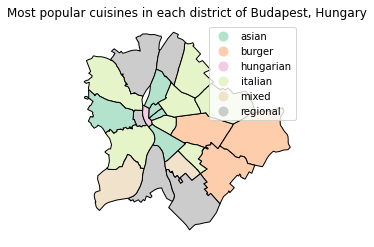

In [24]:
_ = districts_enriched.plot(column='cuisine', cmap='Pastel2', edgecolor='black', legend=True)
_ = plt.title('Most popular cuisines in each district of Budapest, Hungary')
_ = plt.axis('off')
_ = plt.savefig('bp_cuisines.png', dpi=199)
plt.show()

It's interesting to see how dominant Italian food is, with Asian food standing strong in the middle of the city. Interestingly, Hungarian food is only dominant in one out of the 23 districts, right in the heart of the capital.